In [1]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

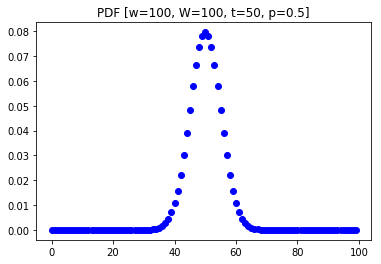

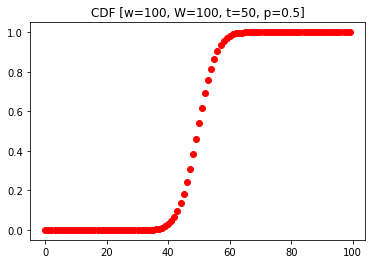

0.02844396682049039


In [106]:
fig, ax = plt.subplots(1, 1)

# example test case
W = 100 # 100 coins in total
n = 100

# t = the amount of members needed for this selection, lets say 10% of the population
t = 50
p = t/W

x = np.arange(0, n, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo')
plt.title(f"PDF [w={n}, W={W}, t={t}, p={p}]")
plt.show()

fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.cdf(x, n, p), 'ro')
plt.title(f"CDF [w={n}, W={W}, t={t}, p={p}]")
plt.show()

# given an interval j, find the sum the were talking about in the paper
# this pretty much calculates the cdf
def sortition_algo_interval(j, n, p):
    x_lower = np.arange(0, j+1, 1)
    x_upper = np.arange(0, j+2, 1)
    return sum(map(lambda x: binom.pmf(x, n, p), x_lower))

# transform this into the proper game of interval selection
# assume val = uniform RV [0, 1]
def sortition(val, n, p):
    k = 0
    while True:
        lower = binom.cdf(k, n, p)
        upper = binom.cdf(k + 1, n, p)
        if (lower <= val and val < upper):
            return (k)
        k = k + 1
        
hash_rv = np.random.uniform(0, 1)

# expectation is that given these odds, p = 0.5, we should see us getting 50% of the all seats
# assuming W = 100, w = 100 (so we own all the money)

print(binom.cdf(40, n, p))

In [108]:
# brute force calculates distribution
def calc_seats(n, p, iterations):
    return list(map(lambda x: sortition(np.random.uniform(0, 1), n, p), range(iterations)))

In [ ]:
iterations = 5000
out = calc_seats(n, p, iterations)

plt.hist(out, bins='auto')
plt.title(f'Histogram [it={iterations}, n={n}, p={p}]')
plt.show()